# Respuesta temporal de sistemas dinámicos

## Respuesta según la ubicación de los polos

Cuando el sistema en estudio está representado por ecuaciones diferenciales ordinarias simultáneas, la función de transferencia resulta ser una razón de polinomios, de la forma:

$$G(s)=\frac{b(s)}{a(s)}$$

donde $a(s)$ y $b(s)$ son polinomios en $s$ y no tienen factores en común. Para sistemas físicamente reales el orden del polinomio denominador $a(s)$ siempre es mayor o igual al orden del numerador $b(s)$, por razones de causalidad.

**Un sistema donde el orden del polinomio denominador de la función transferencia es menor que el del numerador, representa un sistema que depende de valores futuros de la entrada.**

### Polos y Ceros de una función transferencia

```{admonition} Polos
:class: Important

Denominamos **polos** de $G(s)$, a aquellos lugares del plano complejo $s$, en donde la función de transferencia $G(s)$ se hace infinita, o sea donde $a(s) = 0$ (las raíces del polinomio denominador $a(s)$).
```
```{admonition} Ceros
:class: Important

Denominan **ceros** de $G(s)$, a aquellos lugares del plano complejo $s$, en donde la función de transferencia $G(s)$ se hace cero, o sea donde $b(s)=0$ (las raíces del polinomio numerador $b(s)$).
```

Ya que la **respuesta de un sistema a un impulso está dada por su función de transferencia**, a dicha respuesta se la denomina **respuesta natural del sistema**. Podemos usar los polos y ceros para determinar la respuesta temporal y así identificar la forma de la respuestas temporales con las ubicaciones correspondientes de los polos y ceros de la función de transferencia.

```{note}
Los **polos y ceros describen completamente a $G(s)$ **, excepto por un multiplicador constante (ganancia en estado estacionario). Esto significa que las funciones $G(s)$ las podemos representar directamente en el plano $s$.
```

### Ejemplo de la respuesta temporal de sistema LTI

Supongamos la siguiente función de transferencia:

$$H(s) = \frac{2s+1}{s^2+3s+2}$$

a partir de la definición del sistema LTI, tanto por función de transferencia, `tf` o por variables de estado, `ss`, es posible usar métodos (o funciones propias del objeto) para obtener información relacionada al sistema, como ser `pole()`, `zero()` y `dcgain()`, que nos permite obtener los polos, los ceros y la ganancia estacionaria del sistema H(s), respectivamente:

In [1]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H = ctrl.tf([2,1],[1,3,2])
print(H)
print('Polos de la función H(s):', H.pole())
print('Polos de la función H(s):', H.zero())
print('Polos de la función H(s):', H.dcgain())


   2 s + 1
-------------
s^2 + 3 s + 2

Polos de la función H(s): [-2. -1.]
Polos de la función H(s): [-0.5]
Polos de la función H(s): 0.5


```{note}
También es posible usar las funciones anteriores (en lugar de los métodos del propio objeto) de la forma `ctrl.pole(H)`, `ctrl.zero(H)` y `ctrl.dcgain(H)`
```

Otra forma de hallar los polo y ceros de un sistema es usando la función `roots()` de numpy, que permite calcular las raíces de un polinomio:

In [3]:
np.roots(H.den[0][0])

array([-2., -1.])

Las singularidades de una Función de Transferencia los dibujaremos en el plano-s, con cruces (x) para los polos y con círculos (o) para los ceros de la función, como lo muestra la función `pzmap` de la librería `control`

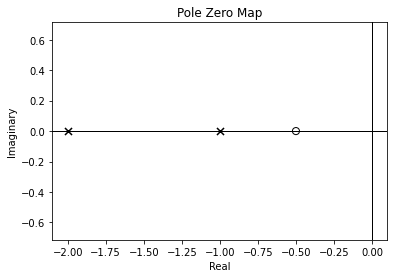

In [4]:
ctrl.pzmap(H);

### Ejemplo: respuesta impulsiva de un sistema LTI

Tomando la función de transferencia del ejemplo anterior:

$$H(s) = \frac{2s+1}{s^2+3s+2}=\frac{2s+1}{(s+1)(s+2)}$$

Separando en **fracciones simples**:

$$H(s) = \frac{-1}{s+1} +\frac{3}{s+2}$$

Utilizando la **tabla de transformadas de Laplace**, obtenemos la **respuesta natural** del sistema:

$$
h(t) = \left\{\begin{array}{rl}
      -e^{-t}+3e^{-2t}, & t\ge 0\\
      0,  & t<0
    \end{array}
  \right.
$$

Graficamos $h(t)$ obtenido a partir de aplicar la antitransformada de Laplace (usando tablas) de la respuesta impulsiva del sistema.

$$\mathcal{L}^{-1}\{Y(s)\} =\mathcal{L}^{-1}\{ H(s)\cdot U(s) \}= \mathcal{L}^{-1}\{H(s)\cdot 1\}=\mathcal{L}^{-1}\{ H(s)\}=h(t)$$

In [5]:
t=np.linspace(0,5,50)
y1=-np.exp(-t)
y2=3*np.exp(-2*t)

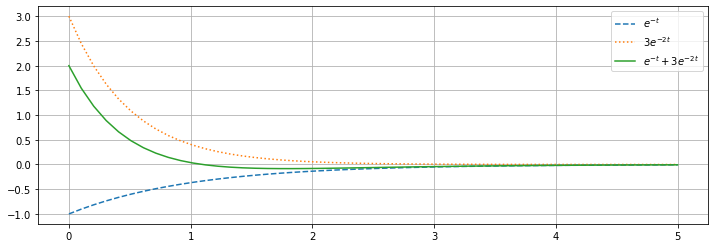

In [6]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t,y1, '--', label=r'$e^{-t}$')
ax.plot(t,y2, ':', label=r'$3e^{-2t}$')
ax.plot(t,y1+y2, label=r'$e^{-t}+3e^{-2t}$')
ax.legend()
plt.grid()

Por lo dicho antes, como la función transferencia de un sistema es la transformada de Laplace de la respuesta al impulso, y la transformada del impulso es 1, podemos graficar esta función temporal, graficando la respuesta al impulso con el comando `impulse_response`:

In [7]:
t, y = ctrl.impulse_response(H)

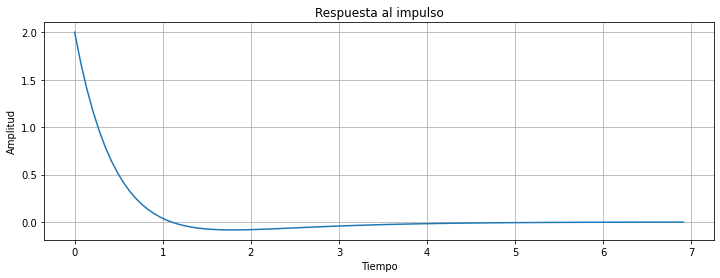

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_title("Respuesta al impulso")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud")
ax.grid()

Veremos otra forma de definir una Función de Transferencia a partir de la definición de la "función de transferencia elemental, s", luego es posible hacer operaciones algebraicas (sumas, restas, divisiones y productos) con esta función para definir la función de transferencia de un sistema dinámico cualquiera.

In [9]:
s = ctrl.tf("s")
H1 = -1/(s+1)
H2 = 3/(s+2)
t1, y1 = ctrl.impulse_response(H1, T=np.linspace(0,7,100))
t2, y2 = ctrl.impulse_response(H2, T=np.linspace(0,7,100))
y = y1 + y2

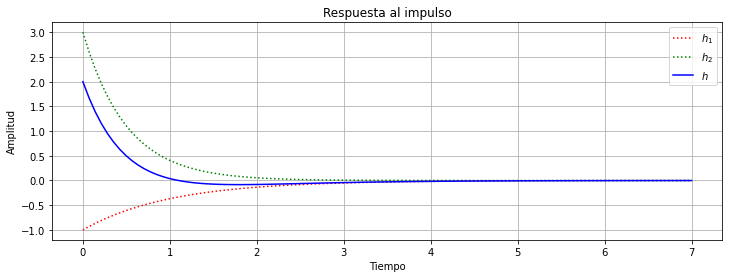

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t1,y1,'r:', label=r"$h_1$")
ax.plot(t2,y2, 'g:',label=r"$h_2$")
ax.plot(t1,y, 'b-', label=r"$h$")
ax.legend()
ax.grid()
ax.set_title("Respuesta al impulso")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud");

### Ejemplo: Respuesta al escalón unitario

Siguiendo con la misma función de transferencia, ahora veremos la respuesta a una señal de entrada del tipo escalón unitario $U(s)=\frac{1}{s}$, por lo que la señal de salida $Y(s)$:

$$Y(s)= H(s)U(s) = \frac{2s+1}{s^2+3s+2}\frac{1}{s} \Longrightarrow \frac{2s+1}{s(s+1)(s+2)}$$

Separando en fracciones simples:

$$Y(s) = \frac{1/2}{s}+\frac{1}{s+1} +\frac{-3/2}{s+2}$$

luego usando la tabla de transformadas de Laplace, obtenemos la respuesta al escalón del sistema en el tiempo:

$$
\left\{
  \begin{array}{lr}
y(t)=0 & \text{para} \quad t<0\\
y(t) = \frac{1}{2} + e^{-t} - \frac{3}{2}e^{-2t} & \text{para}\quad  t\ge 0
\end{array}
\right.

$$

Graficamos $y(t)$ la señal de salida del sistema cuando la entrada es un escalón unitario, pero antes calcularemos el valor final de la señal, usando el teorema del valor final (TVF):

$$
y(\infty)=\lim_{s\rightarrow 0}sY(s)=\lim_{s\rightarrow 0} s\frac{2s+1}{s(s^2+3s+2)}=\frac{1}{2}
$$

In [11]:
t=np.linspace(0,8,50)
y=.5+np.exp(-t)-3/2*np.exp(-2*t)

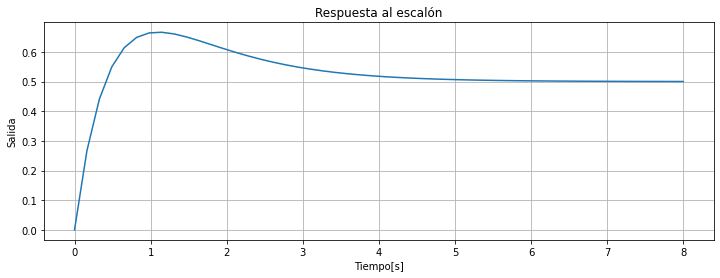

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_title('Respuesta al escalón')
ax.set_xlabel('Tiempo[s]')
ax.set_ylabel('Salida')
ax.grid()

## Respuesta al escalón de un sistema de **primer orden**

Un sistema de primer orden se puede escribir de forma general:

$$H(s) = \frac{K}{\tau .s+1}$$

o de forma equivalente:

$$H(s) = \dfrac{K}{\tau .s +1}$$

Si queremos la respuesta al escalón, entonces hacemos:

$$Y(s) = \dfrac{K}{\tau .s +1}\cdot U(s )= \frac{K}{\tau .s +1}\cdot \frac{1}{s}$$

Aplicando fracciones simples, podemos obtener:

$$Y(s) = \frac{A}{s} + \frac{B}{\tau .s +1} = \frac{K}{s} - \dfrac{K\tau}{\tau .s +1} = \frac{K}{s} - \frac{K}{s + \frac{1}{\tau}}$$

Utilizando tablas podemos obtener:

$$y(t) = K-Ke^{-t/\tau} = K(1-e^{-t/\tau})$$

El parámetro $\tau$, que es el reciproco del polo del sistema de primer orden, está relacionado con el tiempo de respuesta del sistema y se la conoce como constante de tiempo. Su unidad es tiempo (segundo, minuto , horas, etc).

Vamos aver como se comporta según su valor de $\tau$. Para Esto vamos a hacer  $K=1$, y tomaremos tres valors posibles de $\tau$.

In [13]:
k=1
tau_1=1/3
tau_2=1
tau_3=3

h1 = k/(tau_1*s+1)
h2 = k/(tau_2*s+1)
h3 = k/(tau_3*s+1)

t1, y1 = ctrl.step_response(h1, T=np.linspace(0,10,500))
t2, y2 = ctrl.step_response(h2, T=np.linspace(0,10,500))
t3, y3 = ctrl.step_response(h3, T=np.linspace(0,10,500))

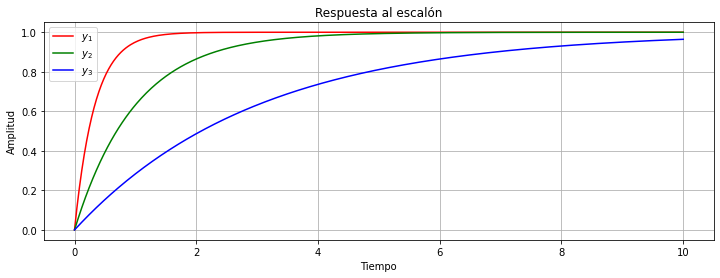

In [14]:
fig, ax=plt.subplots(figsize=(12,4))
ax.plot(t1, y1, 'r', label=r"$y_1$")
ax.plot(t2, y2, 'g', label=r"$y_2$")
ax.plot(t3, y3, 'b', label=r"$y_3$")
ax.legend()
ax.grid()
ax.set_title("Respuesta al escalón")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud");

Vemos primero, que como los sistemas tienen el mismo valor de $K$ entonces el valor final es el mismo para los tres sistemas.

Vemos que el sistema que tiene el $\tau$ más chico, o lo que es lo mismo el polo $\dfrac{1}{\tau}$ más grande es el sistema más rápido.

Voy a graficar unas lineas horizontales sobre la figura anterior

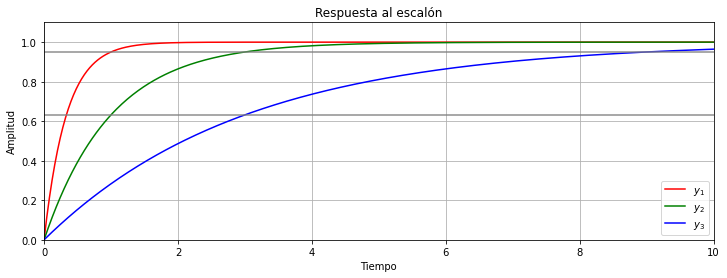

In [15]:
fig, ax=plt.subplots(figsize=(12,4))
ax.plot(t1, y1, 'r', label=r"$y_1$")
ax.plot(t2, y2, 'g', label=r"$y_2$")
ax.plot(t3, y3, 'b', label=r"$y_3$")
ax.legend()
ax.grid()
ax.set_title("Respuesta al escalón")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud")

ax.plot([-1, 11],[1-np.exp(-1), 1-np.exp(-1)], color="grey", alpha=0.9)
ax.plot([-1, 11],[1-np.exp(-3), 1-np.exp(-3)], color="grey", alpha=0.9)
ax.set_xlim([0,10])
ax.set_ylim([0,1.1]);

Podemos ver que los tres sistemas cortan a la linea gris inferior que está en $\approx 0.63$ en el valor de $\tau$. Por lo que podemos concluir que un sistema de primer orden llega al 63\% de su valor final en $\tau$ segundos.

Análogamente, podemos ver que los tres sistemas cortan a la linea gris inferior que está en $\approx 0.95$ en el valor de $\tau$. Por lo que podemos concluir que un sistema de primer orden llega al 95\% de su valor final en $3.\tau$ segundos.

El parámetro $K$ es la ganancia del sistema. Esta relacionado con el valor final al cual llegará el sistema.

Para analizar que sucede con $K$ vamos graficar tres sistemas con $\tau=1$ variando la ganancia.

In [16]:
k_1=0.5
k_2=1
k_3=2
tau=1

h1 = k_1/(tau*s+1)
h2 = k_2/(tau*s+1)
h3 = k_3/(tau*s+1)

t1, y1 = ctrl.step_response(h1, T=np.linspace(0,5,500))
t2, y2 = ctrl.step_response(h2, T=np.linspace(0,5,500))
t3, y3 = ctrl.step_response(h3, T=np.linspace(0,5,500))

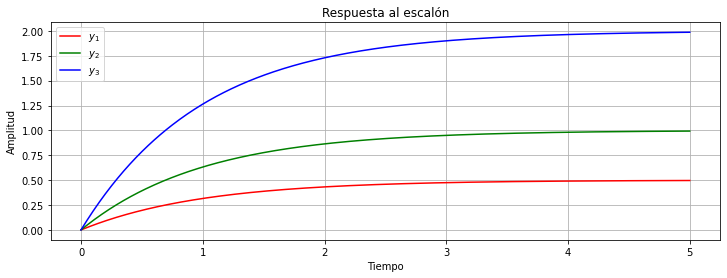

In [17]:
fig, ax=plt.subplots(figsize=(12,4))
ax.plot(t1, y1, 'r', label=r"$y_1$")
ax.plot(t2, y2, 'g', label=r"$y_2$")
ax.plot(t3, y3, 'b', label=r"$y_3$")
ax.legend()
ax.grid()
ax.set_title("Respuesta al escalón")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud");

Si se tiene un sistema de orden $n$ con todas raíces reales se puede descomponer por fracciones simples y analizar las repuesta de los $n$ polos por separados, y de estar forma analizar como se comporta el sistema.

Por lo tanto nos quedaría analizar que pasa cunado los polos del sistema son complejos conjugados

## Sistema de **segundo orden**

Para el caso de raíces complejas conjugadas obtenemos una conclusión similar: los polos determinan la forma de la respuesta temporal.

### Ejemplo: Función de transferencia con polos complejos

Dada la función de transferencia:

$$G(s)=\frac{2s+1}{s^2+2s+5}$$

Separando en fracciones simples:

$$G(s) = \frac{(1+4i)/4i}{s+1+2i}+\frac{(1-4i)/(-4i)}{s+1-2i} = \frac{A}{2}\frac{e^{-i\theta}}{s+1+2i}+\frac{A}{2}\frac{e^{i\theta}}{s+1-2i}$$

Utilizando la tabla de transformadas de Laplace:

$$g(t) = \frac{A}{2}e^{-i\theta}e^{-t}e^{-2it}+\frac{A}{2}e^{i\theta}e^{-t}e^{-2it} = Ae^{-t}\cos(2t+\theta)$$

In [18]:
t=np.linspace(0,5,50)
g=.5+np.exp(-t)-3/2*np.exp(-2*t)

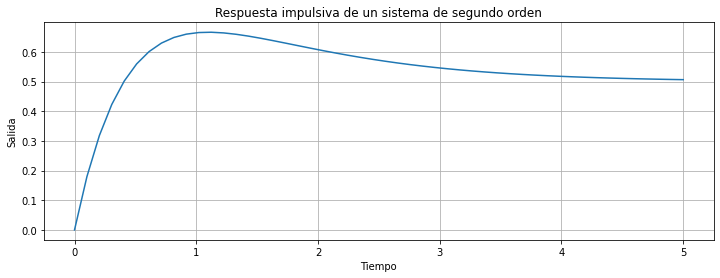

In [19]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t,g)
ax.set_title('Respuesta impulsiva de un sistema de segundo orden')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Salida')
plt.grid()

Como vemos, la respuesta al impulso a un par de polos complejos conjugados es una sinusoide amortiguada por una exponencial. Tanto la exponencial, como la frecuencia de la sinusoide depende solo de los polos.

Otra forma de resolver analíticamente cuando se tienen polos complejos conjugados es buscar la suma de un seno y un coseno de la misma frecuencia, ambos con fase 0. Es decir:

$$G(s)=A_1\frac{s+a}{(s+a)^2+\omega^2}+A_2\frac{\omega}{(s+a)^2+\omega^2}$$

Para esto, primero se debe completar expresar el denominado de la forma anterior completando cuadrados, y luego separar lo que tiene $s$ con omega de ver lo que nos queda sin $s$ para obtener el $A_2$ del coseno.

Para este ejemplo:

$$G(s)=\frac{(2s+1)}{(s+1)^2+4}=A_1\frac{s+1}{(s+1)^2+4}+A_2\frac{2}{(s+1)^2+4}=2\frac{s+1}{(s+1)^2+4}-\frac{1}{2}\frac{2}{(s+1)^2+4}$$

Entonces de tablas y propiedades trigonométricas se obtiene:

$$g(t)=\left(2\cos(2t)-\frac{1}{2}\sin(2t)\right)=\sqrt{\left(\frac{1}{2}\right)^2+2^2} \cos\left(2 t - \tan^{-1}\left(\dfrac{-1/2}{2}\right)\right)$$

En la figura siguiente se esquematiza las respuestas naturales (al impulso) de los sistemas dependiendo de la ubicación de los polos.

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig1.gif" width="600" alt="fig1.gif">

Respuestas temporales asociadas con los respectivos polos en el plano $s$
:::

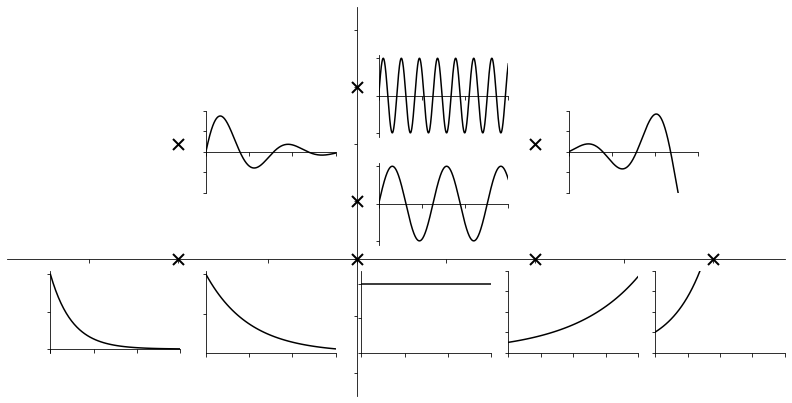

In [20]:
from matplotlib import ticker

fig = plt.figure(figsize=(12,6))

# Eje principal

ax0 = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax0.plot([0, -1, -2, 1, 2, -1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0.5, 1.5], 
         lw=0, marker='x', markersize=11, markerfacecolor='white', markeredgewidth=2, markeredgecolor="black") 
ax0.spines['right'].set_color('none')
ax0.spines['top'].set_color('none')
ax0.xaxis.set_ticks_position('bottom')
ax0.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax0.yaxis.set_ticks_position('left')
ax0.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax0.set_xlim([-1.96, 2.4])
ax0.set_ylim([-1.2, 2.2])
ax0.yaxis.set_major_formatter(ticker.NullFormatter())
ax0.xaxis.set_major_formatter(ticker.NullFormatter())

# Eje polo -2
G1 = ctrl.tf(2,[1,2])
t1,y1 = ctrl.impulse_response(G1,T=np.linspace(0,3))
ax1 = fig.add_axes([0.15, 0.2, 0.15, 0.19])
ax1.plot(t1,y1,'k')
ax1.yaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax1.set_xlim([-0, 3])
ax1.yaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_major_formatter(ticker.NullFormatter())



# Eje polo -1
G2 = ctrl.tf(1,[1,1])
t2,y2 = ctrl.impulse_response(G2,T=np.linspace(0,3))
ax2 = fig.add_axes([0.33, 0.2, 0.15, 0.19])
ax2.plot(t2,y2,'k')
ax2.yaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax2.yaxis.set_ticks_position('left')
ax2.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax2.set_xlim([-0, 3])
ax2.yaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_major_formatter(ticker.NullFormatter())




# Eje polo 0
G3 = ctrl.tf(1,[1,0])
t3,y3 = ctrl.impulse_response(G3,T=np.linspace(0,3))
ax3 = fig.add_axes([0.51, 0.2, 0.15, 0.19])
ax3.plot(t3,y3,'k')
ax3.yaxis.set_major_formatter(ticker.NullFormatter())
ax3.xaxis.set_major_formatter(ticker.NullFormatter())
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax3.yaxis.set_ticks_position('left')
ax3.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax3.set_xlim([0, 3])
ax3.set_ylim([0, 1.2])
ax3.yaxis.set_major_formatter(ticker.NullFormatter())
ax3.xaxis.set_major_formatter(ticker.NullFormatter())

# Eje polo 1
G4 = ctrl.tf(-1,[-1,1])
t4,y4 = ctrl.impulse_response(G4,T=np.linspace(0,2))
ax4 = fig.add_axes([0.68, 0.2, 0.15, 0.19])
ax4.plot(t4,y4,'k')
ax4.yaxis.set_major_formatter(ticker.NullFormatter())
ax4.xaxis.set_major_formatter(ticker.NullFormatter())
ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')
ax4.xaxis.set_ticks_position('bottom')
ax4.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax4.yaxis.set_ticks_position('left')
ax4.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax4.set_xlim([-0, 2])
ax4.set_ylim([0, 8])
ax4.yaxis.set_major_formatter(ticker.NullFormatter())
ax4.xaxis.set_major_formatter(ticker.NullFormatter())

# Eje polo 2
G5 = ctrl.tf(-2,[-1,2])
t5,y5 = ctrl.impulse_response(G5,T=np.linspace(0,2))
ax5 = fig.add_axes([0.85, 0.2, 0.15, 0.19])
ax5.plot(t5,y5,'k')
ax5.yaxis.set_major_formatter(ticker.NullFormatter())
ax5.xaxis.set_major_formatter(ticker.NullFormatter())
ax5.spines['right'].set_color('none')
ax5.spines['top'].set_color('none')
ax5.xaxis.set_ticks_position('bottom')
ax5.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax5.yaxis.set_ticks_position('left')
ax5.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax5.set_xlim([-0, 2])
ax5.set_ylim([0, 8])
ax5.yaxis.set_major_formatter(ticker.NullFormatter())
ax5.xaxis.set_major_formatter(ticker.NullFormatter())

# polo en -0.5j
G6 = ctrl.tf(0.5,[1,0,0.25])
t6,y6 = ctrl.impulse_response(G6,T=np.linspace(0,30, 1000))
ax6 = fig.add_axes([0.53, 0.45, 0.15, 0.19])
ax6.plot(t6,y6,'k')
ax6.yaxis.set_major_formatter(ticker.NullFormatter())
ax6.xaxis.set_major_formatter(ticker.NullFormatter())
ax6.spines['right'].set_color('none')
ax6.spines['top'].set_color('none')
ax6.xaxis.set_ticks_position('bottom')
ax6.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax6.yaxis.set_ticks_position('left')
ax6.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax6.set_xlim([0, 30])
ax6.set_ylim([-1.1, 1.1])
ax6.yaxis.set_major_formatter(ticker.NullFormatter())
ax6.xaxis.set_major_formatter(ticker.NullFormatter())

# polo en -1.5j
G7 = ctrl.tf(1.5,[1,0,2.25])
t7,y7 = ctrl.impulse_response(G7,T=np.linspace(0,30,1000))
ax7 = fig.add_axes([0.53, 0.7, 0.15, 0.19])
ax7.plot(t7,y7,'k')
ax7.yaxis.set_major_formatter(ticker.NullFormatter())
ax7.xaxis.set_major_formatter(ticker.NullFormatter())
ax7.spines['right'].set_color('none')
ax7.spines['top'].set_color('none')
ax7.xaxis.set_ticks_position('bottom')
ax7.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax7.yaxis.set_ticks_position('left')
ax7.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax7.set_xlim([0, 30])
ax7.set_ylim([-1.1, 1.1])
ax7.yaxis.set_major_formatter(ticker.NullFormatter())
ax7.xaxis.set_major_formatter(ticker.NullFormatter())

# polo en -1-2j
G8 = ctrl.tf(5,[1,-2,17])
t8,y8 = ctrl.impulse_response(G8,T=np.linspace(0,3,1000))
ax8 = fig.add_axes([0.75, 0.57, 0.15, 0.19])
ax8.plot(t8,y8,'k')
ax8.yaxis.set_major_formatter(ticker.NullFormatter())
ax8.xaxis.set_major_formatter(ticker.NullFormatter())
ax8.spines['right'].set_color('none')
ax8.spines['top'].set_color('none')
ax8.xaxis.set_ticks_position('bottom')
ax8.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax8.yaxis.set_ticks_position('left')
ax8.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax8.set_xlim([0, 3])
ax8.set_ylim([-10,10])
ax8.yaxis.set_major_formatter(ticker.NullFormatter())
ax8.xaxis.set_major_formatter(ticker.NullFormatter())

# polo en -1-2j
G9 = ctrl.tf(5,[1,2,17])
t9,y9 = ctrl.impulse_response(G9,T=np.linspace(0,3,1000))
ax9 = fig.add_axes([0.33, 0.57, 0.15, 0.19])
ax9.plot(t9,y9,'k')
ax9.yaxis.set_major_formatter(ticker.NullFormatter())
ax9.xaxis.set_major_formatter(ticker.NullFormatter())
ax9.spines['right'].set_color('none')
ax9.spines['top'].set_color('none')
ax9.xaxis.set_ticks_position('bottom')
ax9.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax9.yaxis.set_ticks_position('left')
ax9.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax9.set_xlim([0, 3])
ax9.set_ylim([-1,1])
ax9.yaxis.set_major_formatter(ticker.NullFormatter())
ax9.xaxis.set_major_formatter(ticker.NullFormatter())

Los polos complejos conjugados los podemos definir en términos de sus partes real e imaginaria, tradicionalmente:

$$ s=\sigma\pm i\omega_d$$

Ya que los polos complejos vienen de a pares, el denominador correspondiente al par de complejos es:

$$a(s)=(s+\sigma-i\omega_d)(s+\sigma+i\omega_d)=(s+\sigma)^2+\omega_d^2$$

Cuando encontramos la función de transferencia a partir de ecuaciones diferenciales, típicamente podemos escribir el resultado en la forma polinomial:

$$G(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}=\frac{1}{\frac{s^2}{\omega_n^2}+2\frac{\zeta}{\omega_n}s+1}$$

Comparando las dos últimas ecuaciones, encontramos la relación entre los parámetros:

$$\sigma = \zeta\omega_n$$

y

$$\omega_d = \omega_n \sqrt{1-\zeta^2}$$

A $\zeta$ la conocemos como **coeficiente de amortiguamiento**, y a $\omega_n$ como **frecuencia natural no-amortiguada**. A $\omega_d$ se la conoce como **frecuencia amortiguada** del sistema y se corresponde con la parte imaginaria del sistema. Además, $\sigma$ es la parte real de los polos complejos.

En la figura siguiente observamos el significado gráfico de cada uno de estos parámetros.
:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig2.gif" width="250" alt="fig2.gif">

Significado de los parámetros parámetros respecto la ubicación de los polos en el plano $s$
:::

Teniendo en cuenta la definición de los parámetro anteriores, podemos escribir la respuesta de un sistema con un par de polos complejos conjugados como:

$$y(t)=1-e^{-\sigma t}\left(\cos\omega_d t +\frac{\sigma}{\omega_d}\sin\omega_dt \right) = 1-\frac{e^{-\sigma t}}{\sqrt{(1-\zeta^2)}}\cos(\omega t - \beta)$$

donde $\beta = \tan^{-1} \left( \dfrac{ \zeta } { \sqrt{1-\zeta^2}}  \right)= \sin^{-1}(\zeta)$.

Podemos observar en la figura siguiente que cuando el coeficiente de amortiguamiento $\zeta$ es cercano a cero las respuestas del sistema son oscilatorias. A medida que $\zeta$ se acerca a 1 el amortiguamiento de las oscilaciones es mayor, hasta el punto de no presentarlas.

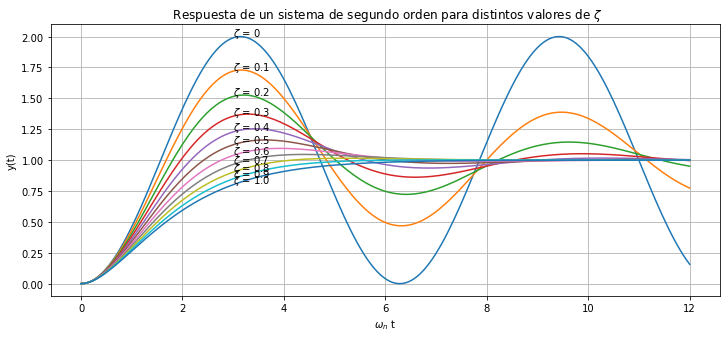

In [21]:
t=np.linspace(0,12,200)
wn=1
xi=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]

fig, ax = plt.subplots(figsize=(12, 5))

for i in range(11):
    G=ctrl.tf(wn**2,[1,2*xi[i]*wn,wn**2])
    t,y=ctrl.step_response(G,T=t)
    plt.plot(t,y)
    indice=np.where(t>=3)
    plt.text(3,y[(indice[0][0])]+0.01, r'$\zeta$ = %s'%xi[i])

ax.grid()
ax.set_xlabel(r'$\omega_n$ t')
ax.set_ylabel('y(t)')
ax.set_title(r' Respuesta de un sistema de segundo orden para distintos valores de $\zeta$');

## Especificaciones en el dominio temporal

Las especificaciones para el diseño de un sistema de control frecuentemente involucran ciertos requerimientos asociados a la respuesta temporal del sistema. Los requerimientos para una respuesta a un escalón los expresamos en términos de valores estándar ilustrados en la figura siguiente:

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig4.png" width="450" alt="fig4.png">

Definiciones de tiempo de crecimiento, tiempo de establecimiento, tiempo del pico y sobrepico de una respuesta a un escalón.

:::

- *Tiempo de crecimiento (rise time)* $t_r$  es el tiempo que toma el sistema para alcanzar la vecindad de su nuevo set-point.

- *Tiempo de establecimiento (settling time)* $t_s$ es el tiempo que toma el sistema para que el transitorio decaiga (en este curso se tomará por defecto el 1\% del valor final).

- *Sobrepico (overshoot)* $M_p$ es la cantidad máxima que el sistema se sobrepasa en el transitorio su valor final dividido ese valor final (frecuentemente se lo da en porcentaje).

- *Tiempo del pico (peak time)* $t_p$ es el tiempo que toma el sistema para alcanzar el máximo valor (el sobrepico).

Analicemos el caso de una respuesta de un sistema de segundo orden (observemos la figura anterior). Examinando las curvas bajo las definiciones de las especificaciones podemos dar relaciones entre las especificaciones y los valores de $\zeta$ y $\omega_n$. Si consideramos, por ejemplo, la curva para $\zeta = 0.5$ (como promedio), podemos decir que el tiempo de crecimiento es:

$$t_r=\frac{1.8}{\omega_n}$$

Para el sobrepico podemos determinar una relación en forma más analítica, obteniendo para qué punto la derivada de la respuesta a un escalón de un sistema de segundo orden se hace cero, y luego evaluándola en ese punto. Así obtenemos:

$$t_p =\frac{\pi}{\omega_d}$$

y

$$M_P= e^{-\dfrac{\pi\zeta}{\sqrt{1-\zeta^2}}}, \quad 0\leq \zeta < 1$$

Para el caso del tiempo de establecimiento, la duración del mismo estará dada principalmente por la exponencial envolvente.

Supongamos que queremos el tiempo de asentamiento al 1% entonces:

$$e^{-\zeta\omega_nt_s}=0.01$$

Aplicando el logaritmo natural a ambos miembros y despejando se tiene:

$$t_s= \frac{4.6}{\sigma} =\frac{4.6}{\zeta\omega_n} \qquad \text{(considerando la banda +/- 1%)}$$

Análogamente al 2%:

$$e^{-\zeta\omega_nt_s}=0.02$$

de donde se obtiene que:

$$t_s = \frac{4}{\sigma} =\frac{4}{\zeta\omega_n} \qquad \text{(considerando la banda +/- 2%)}$$

Este tipo de especificaciones nos darán inecuaciones que limitarán los parámetros $\omega_n$, $\zeta$, y $\sigma$; que a su vez limitarán la ubicación de los polos en el plano s, como mostramos en la figura siguiente.

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig5.png" width="650" alt="fig5.png">

Limitación de ubicación de los polos en el plano $s$ respecto a las especificaciones.
:::

## Reglas a considerar para el diseño de un sistema de control

1. Para un sistema de segundo orden con ceros no finitos, los parámetros transitorios los aproximamos por:

$$t_r\approx \frac{1.8}{\omega_n}$$

$$t_s\approx \frac{4.6}{\zeta\omega_n}\qquad \text{al 1%}$$

1. Un cero adicional en el semiplano izquierdo aumentará el sobrepico si está en un factor 4 de la parte real de los polos complejos.
1. Un cero adicional en el semiplano derecho bajará el sobrepico (y puede que la respuesta a un escalón parta en dirección contraria).
1. Un polo adicional en el semiplano izquierdo aumentará el tiempo extra dentro de un factor 4 de la parte real de los polos complejos.